In [3]:
df= pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-10-26/visualisations/listings.csv", index_col='id')
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  17 
Entradas:  23359


In [20]:
df_clean = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-10-26/visualisations/listings.csv", index_col='id')
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  17 
Entradas:  23359


In [2]:
import pandas as pd

In [6]:
#como nesse caso o dataset possui poucas colunas
#substituir o nome das variaveis para facilitara a interpretação e indice
subst_variaveis= {'id':'id', 'name':'nome','host_id':'proprietario_id', 'host_name':'proprietario_nome',
                  'neighbourhood_group':'vizinhanca', 'neighbourhood':'bairro', 'latitude':'latitude', 'longitude':'longitude',
                    'room_type':'tipo_quarto', 'price':'preco', 'minimum_nights':'minimo_noite',
                 'number_of_reviews':'numero_de_avalia', 'last_review':'ultimo_review', 'reviews_per_month':'reviews_mes', 'calculated_host_listings_count':'imoveis_prop', 'availability_365':'dias_ano', 'number_of_reviews_ltm':'avaliacoes_ano'
}
df.rename(columns=subst_variaveis, inplace=True)

In [21]:
#como nesse caso o dataset possui poucas colunas
#substituir o nome das variaveis para facilitara a interpretação e indice
subst_variaveis= {'id':'id', 'name':'nome','host_id':'proprietario_id', 'host_name':'proprietario_nome',
                  'neighbourhood_group':'vizinhanca', 'neighbourhood':'bairro', 'latitude':'latitude', 'longitude':'longitude',
                    'room_type':'tipo_quarto', 'price':'preco', 'minimum_nights':'minimo_noite',
                 'number_of_reviews':'numero_de_avalia', 'last_review':'ultimo_review', 'reviews_per_month':'reviews_mes', 'calculated_host_listings_count':'imoveis_prop', 'availability_365':'dias_ano', 'number_of_reviews_ltm':'avaliacoes_ano'
}
df_clean.rename(columns=subst_variaveis, inplace=True)

In [7]:
df.head(3)


,nome,proprietario_id,proprietario_nome,vizinhanca,bairro,latitude,longitude,tipo_quarto,preco,minimo_noite,numero_de_avalia,ultimo_review,reviews_mes,imoveis_prop,dias_ano,avaliacoes_ano,license
id,,,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,266,2021-05-21,2.07,1,262,12,NaN
24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2017-04-22,0.85,1,57,0,NaN
25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,168,4,238,2019-04-27,1.84,1,300,0,NaN


In [8]:
df.ultimo_review= pd.to_datetime(df.ultimo_review, format='%Y-%m-%d')
df["ultimo_review"].head(1)

id
17878   2021-05-21
Name: ultimo_review, dtype: datetime64[ns]

In [9]:
#criar 2 vairaveis, uma carregando os valores nulos
#e outra sumando os valores nulos carregados
nulos= df.isnull()
total= nulos.sum()
porcentagem= ((total/nulos.count())*100)
#criar variavel para cocatenar as variaveis total+porcentagem
df_faltantes= pd.concat([total, porcentagem], axis=1, keys=['Total Faltantes', 'Percentual'])
#eliminar os resultados zerados
df_faltantes= df_faltantes[df_faltantes['Total Faltantes']>0]
#exibir resultado
df_faltantes.sort_values(by='Percentual', ascending=False)

,Total Faltantes,Percentual
vizinhanca,23359,100.000000
license,23359,100.000000
ultimo_review,8252,35.326855
reviews_mes,8252,35.326855
nome,21,0.089901
proprietario_nome,5,0.021405


In [10]:
df.describe().round(1)


,proprietario_id,vizinhanca,latitude,longitude,preco,minimo_noite,numero_de_avalia,reviews_mes,imoveis_prop,dias_ano,avaliacoes_ano,license
count,23359.0,0.0,23359.0,23359.0,23359.0,23359.0,23359.0,15107.0,23359.0,23359.0,23359.0,0.0
mean,105444789.8,NaN,-23.0,-43.2,729.5,5.3,14.4,0.7,7.0,223.7,3.4,NaN
std,115255358.0,NaN,0.0,0.1,4977.7,22.6,33.7,0.9,20.6,131.7,8.1,NaN
min,3607.0,NaN,-23.1,-43.7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
25%,14390811.5,NaN,-23.0,-43.3,160.0,1.0,0.0,0.1,1.0,89.0,0.0,NaN
50%,61301861.0,NaN,-23.0,-43.2,286.0,3.0,2.0,0.3,1.0,256.0,0.0,NaN
75%,160833906.0,NaN,-23.0,-43.2,561.0,4.0,11.0,1.0,3.0,359.0,2.0,NaN
max,428843633.0,NaN,-22.7,-43.1,637760.0,1000.0,494.0,24.4,179.0,365.0,250.0,NaN


In [11]:
plt.figure(figsize=(20,5))
df.boxplot()
plt.show()

NameError: name 'plt' is not defined

In [14]:
# importação de todas as bibliotecas necessárias
## para essa analise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno
 
from bokeh.io import output_notebook, show
from bokeh.io import output_notebook, show
from bokeh.palettes import brewer, Spectral, Viridis3, Viridis256, d3
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, BasicTicker, ColorBar, LinearColorMapper
from bokeh.transform import cumsum, factor_cmap, transform, jitter
 
from math import pi
 
output_notebook()

Loading BokehJS ...

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pablo\anaconda3\python.exe -m pip install --upgrade pip' command.


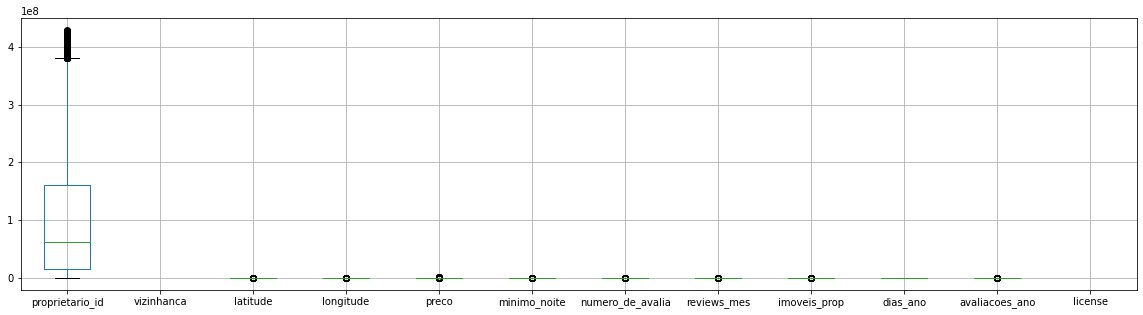

In [15]:
plt.figure(figsize=(20,5))
df.boxplot()
plt.show()

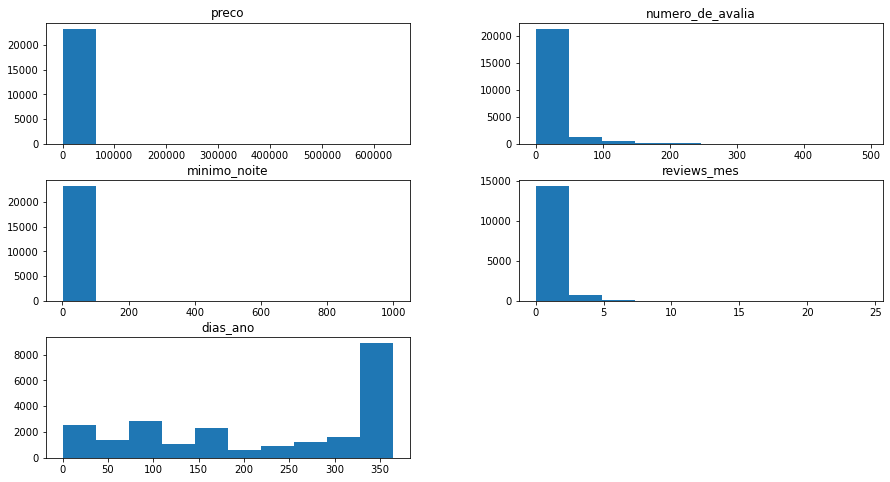

In [16]:
df[["preco", "numero_de_avalia", "minimo_noite", "reviews_mes", 
    "dias_ano"]].hist(figsize=(15,8), grid=False);

In [17]:
# identificar os outliers para a variavel preco
q1_preco = df.preco.quantile(.25)
q3_preco = df.preco.quantile(.75)
IQR_preco = q3_preco - q1_preco
print('IQR da variavel preço: ', IQR_preco)

# definindo os limites
sup_preco = q3_preco + 1.5 * IQR_preco
inf_preco = q1_preco - 1.5 * IQR_preco

print('Limite superior de preço: ', sup_preco)
print('Limite inferior de preço: ', inf_preco)

IQR da variavel preço:  401.0
Limite superior de preço:  1162.5
Limite inferior de preço:  -441.5


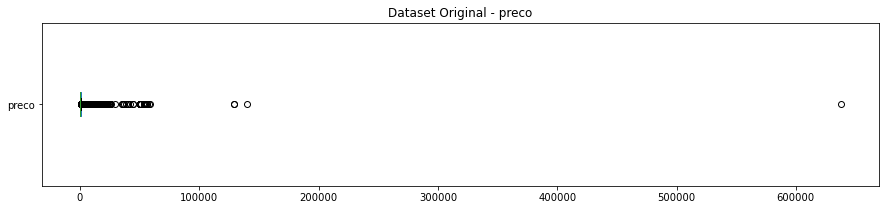

O dataset possui 23359 colunas
15721 Entradas acima de 197.5
Representam 67.30% do dataset


In [22]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.preco.plot(kind='box', vert=False);
ax.set_title('Dataset Original - preco')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 197.5".format(len(df_clean[df_clean.preco > 197.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.preco > 197.5]) / df_clean.shape[0])*100))

In [23]:
# identificar os outliers para a variavel avaliacoes
q1_avaliacoes = df.numero_de_avalia.quantile(.25)
q3_avaliacoes = df.numero_de_avalia.quantile(.75)
IQR_avaliacoes = q3_preco - q1_preco
print('IQR da variavel avaliacoes: ', IQR_avaliacoes)
#DEFINIR LIMITES
sup_aval = q3_avaliacoes + 1.5 * IQR_avaliacoes
inf_aval = q1_avaliacoes - 1.5 * IQR_avaliacoes
print('Limite sup de avaliacoes: ', sup_preco)
print('Limite inf de avaloacoes: ', inf_aval)

IQR da variavel avaliacoes:  401.0
Limite sup de avaliacoes:  1162.5
Limite inf de avaloacoes:  -601.5


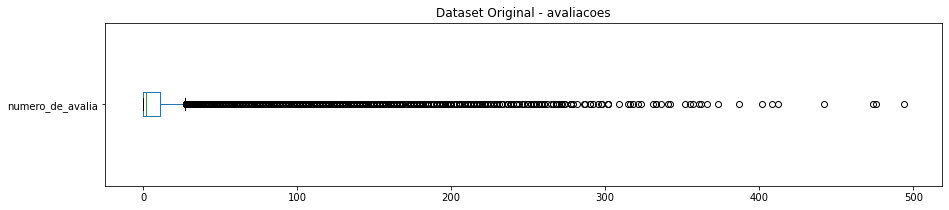

O dataset possui 23359 colunas
157 Entradas acima de 197.5
Representam 0.67% do dataset


In [25]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.numero_de_avalia.plot(kind='box', vert=False);
ax.set_title('Dataset Original - avaliacoes')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 197.5".format(len(df_clean[df_clean.numero_de_avalia > 197.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.numero_de_avalia > 197.5]) / df_clean.shape[0])*100))

In [26]:
#verificando outliers variavel quant_minima
q1_qtmin = df.minimo_noite.quantile(.25)
q3_qtmin = df.minimo_noite.quantile(.75)
IQR_qtmim = q3_qtmin - q1_qtmin
print('IQR para variavel quant_noite_min: ', IQR_qtmim)

#definir limites
sup_qtmin = q3_qtmin + 1.5 * IQR_qtmim
inf_qtmin = q1_qtmin - 1.5 * IQR_qtmim
print('Limite superior vriavel: ', sup_qtmin)
print('Limite inferior variavel: ', inf_qtmin)

IQR para variavel quant_noite_min:  3.0
Limite superior vriavel:  8.5
Limite inferior variavel:  -3.5


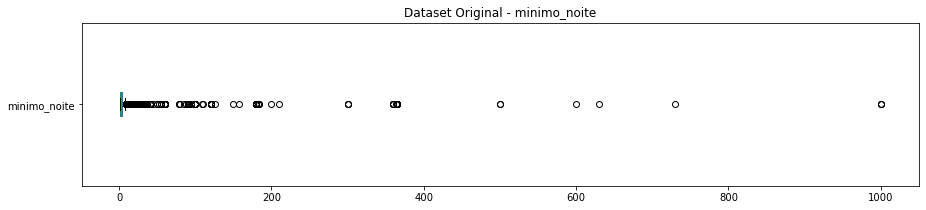

O dataset possui 23359 colunas
2869 Entradas acima de 6
Representam 12.28% do dataset


In [27]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimo_noite.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimo_noite')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6".format(len(df_clean[df_clean.minimo_noite > 6])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimo_noite > 6]) / df_clean.shape[0])*100))

In [28]:
#verificando outliers variavel dias_ano
q1_dias_ano = df_clean.dias_ano.quantile(.25)
q3_dias_ano = df_clean.dias_ano.quantile(.75)
IQR_dias_ano = q3_dias_ano - q1_dias_ano
print('IQR para a variavel dias_ano: ', IQR_dias_ano)
#limites para a veriavel dias_ano
sup_dias_ano = q3_dias_ano + 1.5 * IQR_dias_ano
inf_dias_ano = q1_dias_ano - 1.5 * IQR_dias_ano
print('Limite superior variavel:', sup_dias_ano)
print('Limite inferior variavel:', inf_dias_ano)

IQR para a variavel dias_ano:  270.0
Limite superior variavel: 764.0
Limite inferior variavel: -316.0


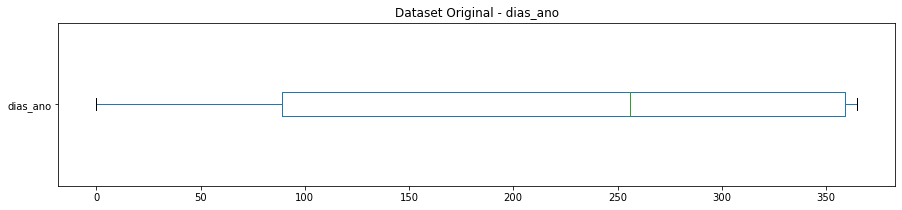

O dataset possui 23359 colunas
0 Entradas acima de 6
Representam 0.00% do dataset


In [29]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.dias_ano.plot(kind='box', vert=False);
ax.set_title('Dataset Original - dias_ano')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6".format(len(df_clean[df_clean.dias_ano > 780.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.dias_ano > 780.0]) / df_clean.shape[0])*100))

In [31]:
df_clean = df.copy()
#limpando as variaveis
df_clean.drop(df_clean[df_clean.preco > 197.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.preco == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.numero_de_avalia > 197.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.numero_de_avalia == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noite > 6.0].index, axis=0, inplace=True) 
df_clean.drop(df_clean[df_clean.dias_ano == 0.0].index, axis=0, inplace=True)         

print('Shape antes limpeza: ', df.shape)
print('Shape após limpeza: ', df_clean.shape)

Shape antes limpeza:  (23359, 17)
Shape após limpeza:  (4965, 17)


In [32]:
df_clean.describe().round(1)


,proprietario_id,vizinhanca,latitude,longitude,preco,minimo_noite,numero_de_avalia,reviews_mes,imoveis_prop,dias_ano,avaliacoes_ano,license
count,4965.0,0.0,4965.0,4965.0,4965.0,4965.0,4965.0,4965.0,4965.0,4965.0,4965.0,0.0
mean,112199246.3,NaN,-23.0,-43.2,130.1,2.3,24.4,0.8,3.5,204.7,6.3,NaN
std,113260147.3,NaN,0.0,0.1,39.4,1.2,34.3,1.0,6.2,125.1,9.9,NaN
min,11739.0,NaN,-23.1,-43.7,39.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN
25%,15925361.0,NaN,-23.0,-43.2,100.0,1.0,3.0,0.1,1.0,87.0,0.0,NaN
50%,69790843.0,NaN,-23.0,-43.2,133.0,2.0,9.0,0.4,2.0,200.0,2.0,NaN
75%,177131210.0,NaN,-22.9,-43.2,161.0,3.0,31.0,1.1,3.0,337.0,8.0,NaN
max,426889218.0,NaN,-22.7,-43.1,197.0,6.0,196.0,11.4,132.0,365.0,97.0,NaN


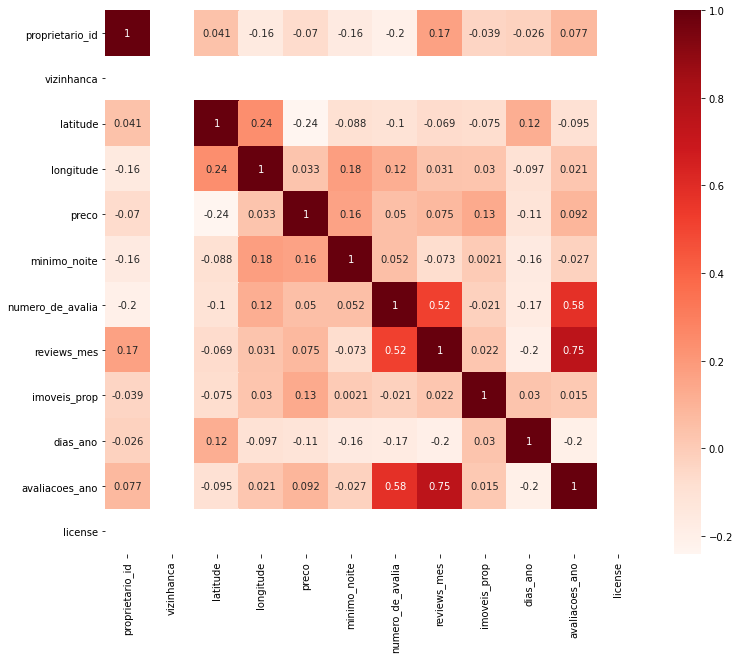

In [33]:
plt.figure(figsize=(12,10))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [34]:
df_clean.groupby(['bairro']).preco.mean().sort_values(ascending=False)[:10]


bairro
Higienópolis        180.000000
Encantado           178.000000
Grumari             177.000000
Bancários           170.000000
Magalhães Bastos    170.000000
Parada de Lucas     169.000000
Cachambi            155.750000
Camorim             154.931818
Osvaldo Cruz        151.000000
Freguesia (Ilha)    150.000000
Name: preco, dtype: float64

In [35]:
df_clean.groupby(['bairro']).preco.mean().sort_values(ascending=False)[116:126]


bairro
Alto da Boa Vista    77.333333
Honório Gurgel       71.333333
Senador Camará       70.000000
Tomás Coelho         65.000000
Santíssimo           62.000000
Jacaré               60.000000
Mangueira            60.000000
Pilares              60.000000
Ramos                60.000000
Del Castilho         60.000000
Name: preco, dtype: float64

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


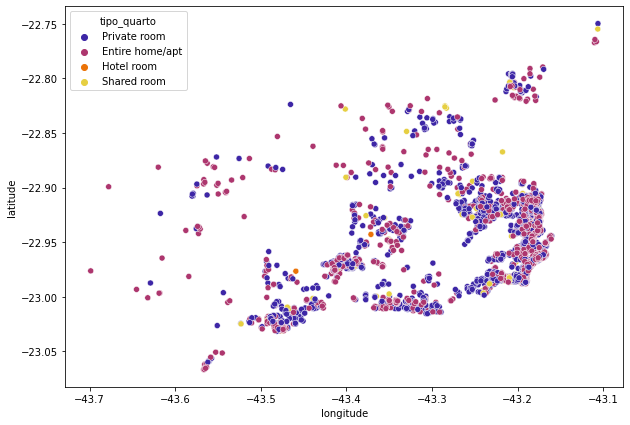

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_clean.longitude, df_clean.latitude, hue=df_clean.tipo_quarto, 
                palette="CMRmap");

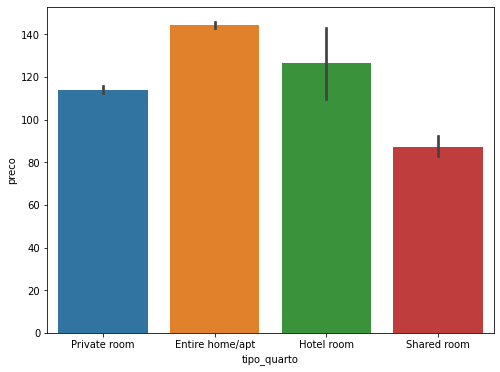

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='tipo_quarto', y='preco', data=df_clean);

In [39]:
data = df_clean[['tipo_quarto','numero_de_avalia']]
cats = list(df_clean.quarto_tipo.unique())

source = ColumnDataSource(data)

p = figure(plot_width=880, plot_height=500, y_range=cats, title="TIPOS DE QUARTOS MAIS BEM AVALIADOS")

p.circle(x='numero_de_avalia', y=jitter('quarto_tipo', width=0.4, range=p.y_range),  source=source, alpha=0.4)

p.x_range.start = 0
p.x_range.end = 200

p.x_range.range_padding = 1
p.ygrid.grid_line_color = None

show(p)

In [40]:
# Bairro mais procurados
df_clean.groupby(['bairro', 'tipo_quarto']).dias_ano.mean().sort_values(ascending=False)[:20]

bairro                   tipo_quarto    
Paquetá                  Shared room        365.0
Curicica                 Shared room        365.0
Jardim Guanabara         Shared room        365.0
Parque Anchieta          Shared room        365.0
Cidade de Deus           Private room       365.0
Penha Circular           Private room       365.0
Pitangueiras             Private room       365.0
Portuguesa               Shared room        365.0
Campo Grande             Shared room        365.0
Joá                      Shared room        365.0
Lagoa                    Shared room        365.0
Cosme Velho              Shared room        365.0
Benfica                  Private room       365.0
Guaratiba                Private room       365.0
Engenho Novo             Shared room        365.0
Santo Cristo             Entire home/apt    365.0
Santíssimo               Entire home/apt    365.0
Andaraí                  Shared room        365.0
Bonsucesso               Private room       364.8
Freguesia